In [1]:
import os
import tweepy
import ssl
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from os.path import join, dirname
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer

plt.style.use('fivethirtyeight')

load_dotenv()

API_KEY = os.environ.get('TWITTER_API_KEY')

API_SECRET_KEY = os.environ.get('TWITTER_API_SECRET')

auth = tweepy.OAuthHandler(API_KEY,API_SECRET_KEY)


api = tweepy.API(auth)



In [2]:
tweets = []

for page in range(1, 5):
    tweets.extend(api.user_timeline(
        screen_name='@RailaOdinga', count=100))
print("number of tweets extracted will be {}".format(len(tweets)))

number of tweets extracted will be 400


In [3]:
own_tweets = [tweet for tweet in tweets if tweet.retweeted ==
              False and 'RT @' not in tweet.text]
for tweet in own_tweets[:5]:
    print(tweet.text,  tweet.created_at)

Mathew 18: 19-20 “Again, truly I tell you that if two of you on earth agree about anything they ask for, it will be… https://t.co/FVKi86XP8z 2022-08-07 13:17:36+00:00
Hali ya hewa leo imekubali mabadiliko jee wewe? Baridi imefunikwa na JUA la BLUU! Mwangaza ni BLUU. 

Kenya ni BLUU… https://t.co/iRSIU759WZ 2022-08-06 14:58:50+00:00
Wana Azimio nawasihi, chezeni kama nyinyi, mtoke wote mpige kura asubuhi na mapema siku ya Jumanne tufunge hii kazi… https://t.co/MUlIgklCOM 2022-08-06 14:02:05+00:00
Leo ni Leo! https://t.co/zkhPJfDJX6 2022-08-06 12:13:33+00:00
The Grand Finale,kata simu tuko site #Inawezekana #VoteBlue https://t.co/qBRMTYnnLN 2022-08-06 11:25:27+00:00


In [4]:
df = pd.DataFrame(data=[[tweet.created_at, tweet.text, len(tweet.text), tweet.id, tweet.favorite_count, tweet.retweet_count] for tweet in own_tweets],
                  columns=['Date', 'Tweets', 'Length of text', 'id', 'Likes', 'Retweets'])
df.head()

,Date,Tweets,Length of text,id,Likes,Retweets
0,2022-08-07 13:17:36+00:00,"Mathew 18: 19-20 “Again, truly I tell you that...",140,1556268322823385089,3249,388
1,2022-08-06 14:58:50+00:00,Hali ya hewa leo imekubali mabadiliko jee wewe...,140,1555931408723492865,1796,343
2,2022-08-06 14:02:05+00:00,"Wana Azimio nawasihi, chezeni kama nyinyi, mto...",140,1555917130033414144,2879,396
3,2022-08-06 12:13:33+00:00,Leo ni Leo! https://t.co/zkhPJfDJX6,35,1555889816130256897,6959,832
4,2022-08-06 11:25:27+00:00,"The Grand Finale,kata simu tuko site #Inawezek...",83,1555877709548584962,1219,232


In [5]:
df[df['Likes'] == df['Likes'].max()]['Tweets']

3      Leo ni Leo! https://t.co/zkhPJfDJX6
100    Leo ni Leo! https://t.co/zkhPJfDJX6
197    Leo ni Leo! https://t.co/zkhPJfDJX6
294    Leo ni Leo! https://t.co/zkhPJfDJX6
Name: Tweets, dtype: object

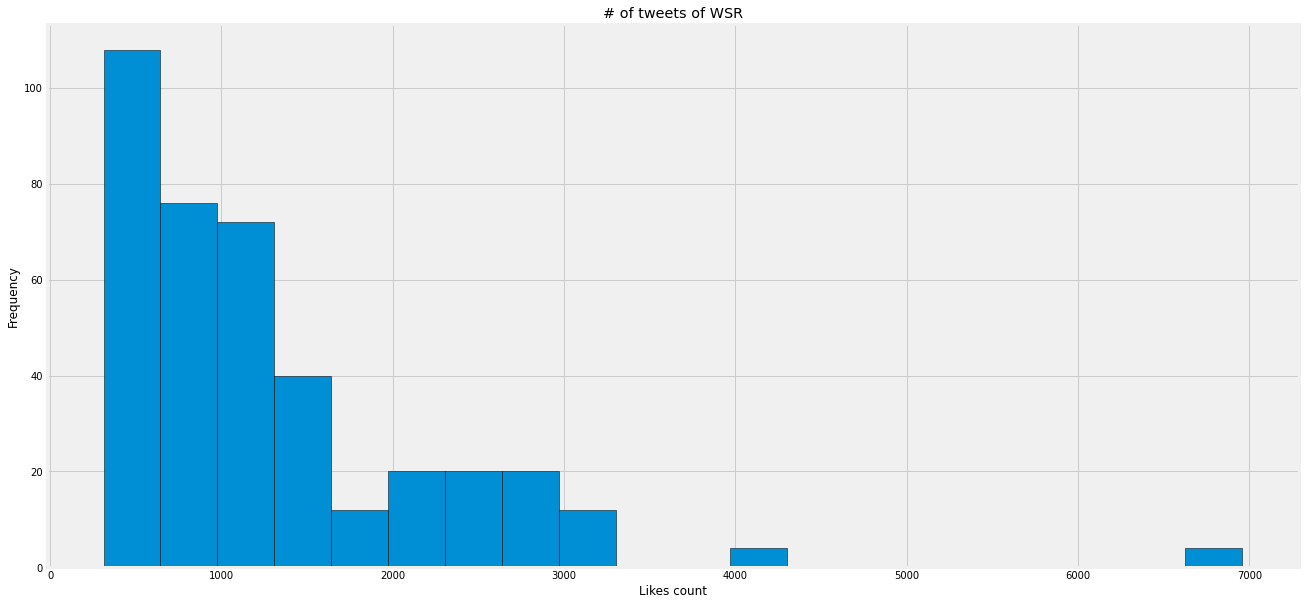

In [6]:
df['Likes'].plot(kind='hist', bins=20, figsize=(20, 10), ec='black')
plt.xlabel('Likes count')
plt.ylabel('Frequency')
plt.title('# of tweets of WSR')
plt.show()

In [7]:
import nltk
import ssl

try:
     _create_unverified_https_context =     ssl._create_unverified_context
except AttributeError:
     pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tintin72/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [8]:
vader = SentimentIntensityAnalyzer()

f = lambda tweet: vader.polarity_scores(tweet)['compound']
df['Sentiment'] = df['Tweets'].apply(f)
df['Date'] = pd.to_datetime(df['Date']).dt.date
df.head()

,Date,Tweets,Length of text,id,Likes,Retweets,Sentiment
0,2022-08-07,"Mathew 18: 19-20 “Again, truly I tell you that...",140,1556268322823385089,3249,388,0.6597
1,2022-08-06,Hali ya hewa leo imekubali mabadiliko jee wewe...,140,1555931408723492865,1796,343,0.0000
2,2022-08-06,"Wana Azimio nawasihi, chezeni kama nyinyi, mto...",140,1555917130033414144,2879,396,0.0000
3,2022-08-06,Leo ni Leo! https://t.co/zkhPJfDJX6,35,1555889816130256897,6959,832,0.0000
4,2022-08-06,"The Grand Finale,kata simu tuko site #Inawezek...",83,1555877709548584962,1219,232,0.4588


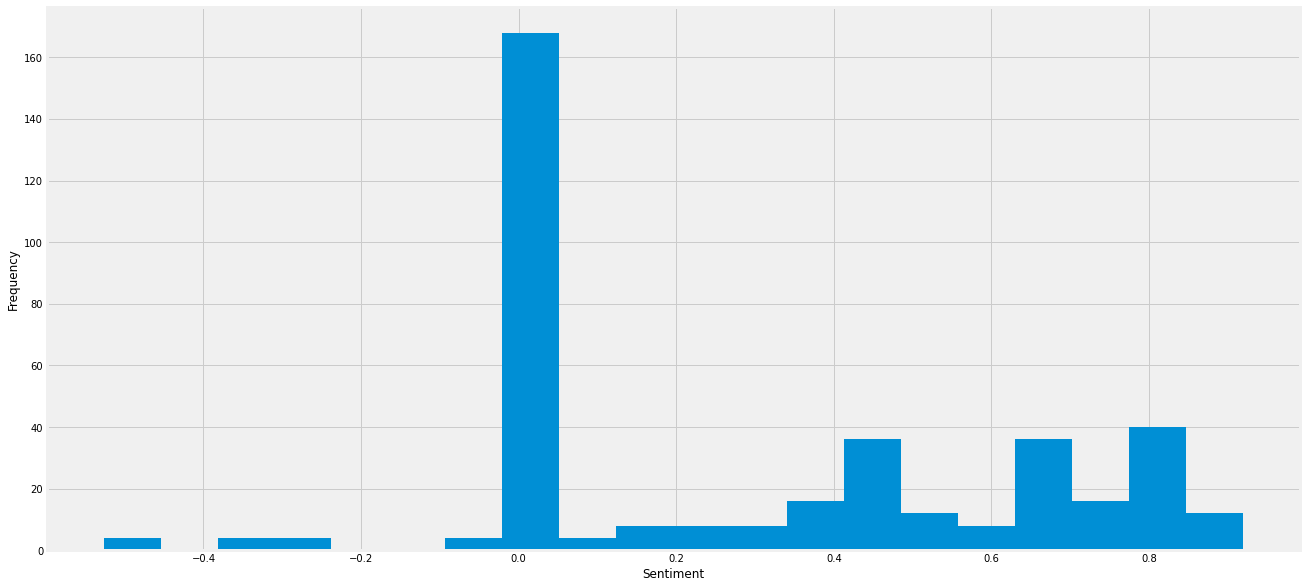

In [9]:
df['Sentiment'].plot(kind='hist', bins=20, figsize=(20,10))
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Average sentiment analysis of WSR tweets against time')

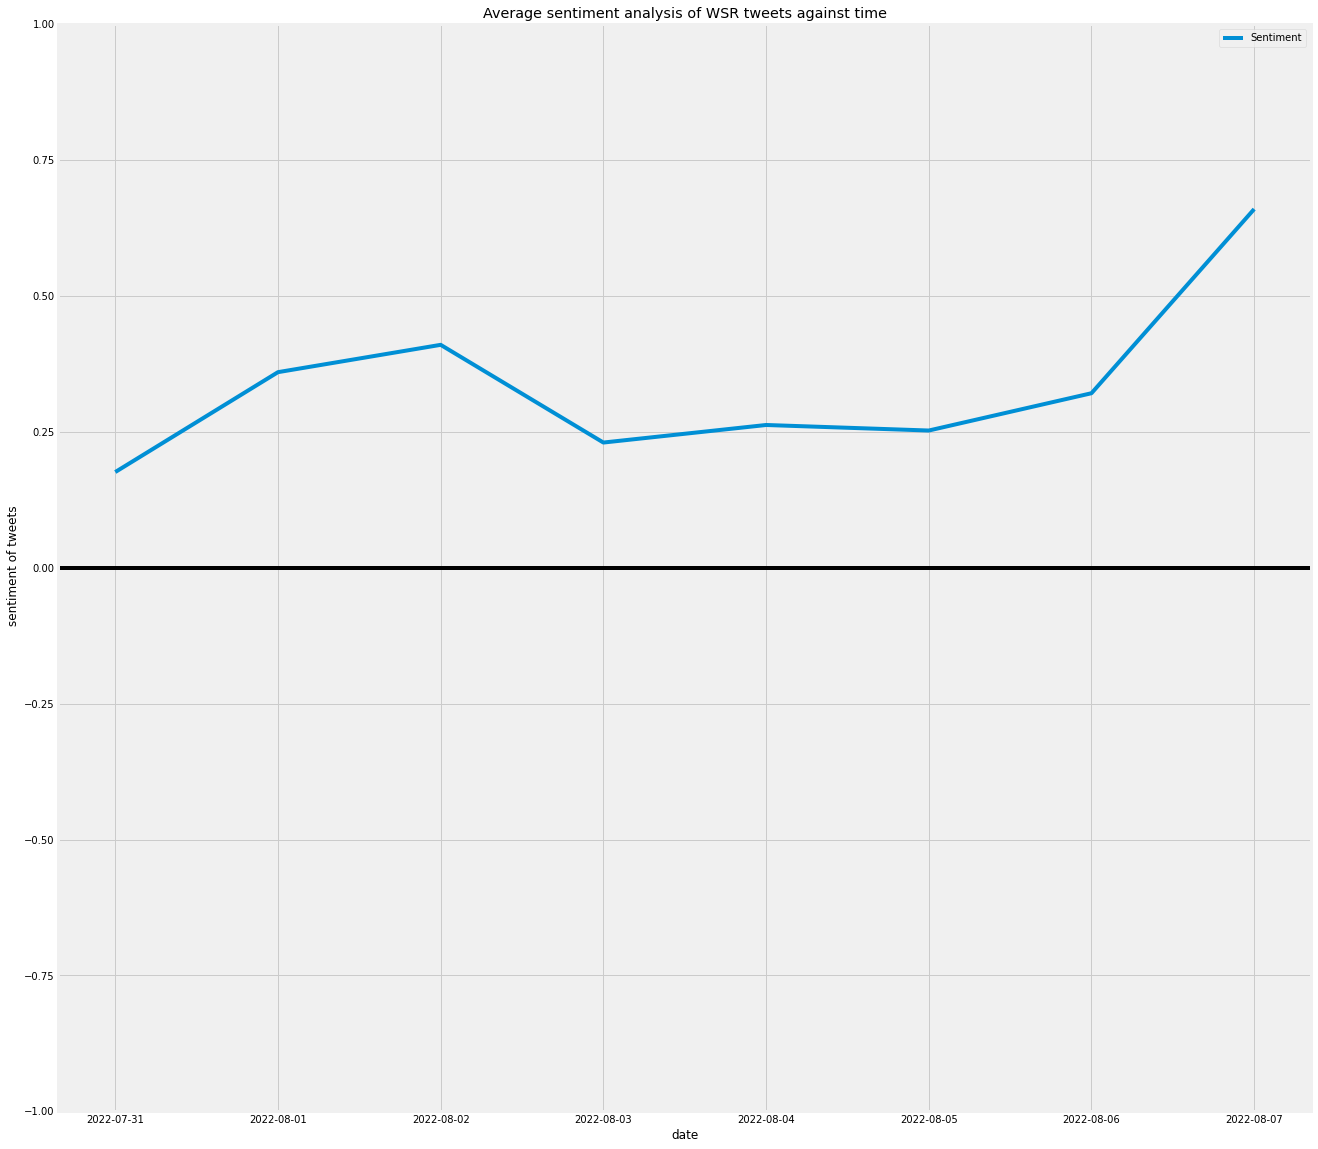

In [10]:
date_df = df.groupby(['Date']).mean().reset_index()
# date_df.head()
date_df.plot(kind='line', x="Date",y='Sentiment', figsize=(20,20), ylim=[-1,1])
plt.axhline(y=0, color='black')
plt.xlabel('date')
plt.ylabel(' sentiment of tweets')
plt.title('Average sentiment analysis of WSR tweets against time')

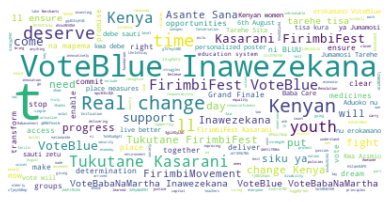

In [11]:
from wordcloud import WordCloud, STOPWORDS

text =  ' '.join(text for text in df.Tweets)

stopwords = set(STOPWORDS)

stopwords.update(['HTTPS', 'CO'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
t = df.Tweets
print(t)

0      Mathew 18: 19-20 “Again, truly I tell you that...
1      Hali ya hewa leo imekubali mabadiliko jee wewe...
2      Wana Azimio nawasihi, chezeni kama nyinyi, mto...
3                    Leo ni Leo! https://t.co/zkhPJfDJX6
4      The Grand Finale,kata simu tuko site #Inawezek...
                             ...                        
383    On the 9th of August, Kenyans have a date with...
384    Our program to fight corruption will enhance a...
385    A wonderful day out in the Rift Valley. Fantas...
386    RIFT IMESHIFT! #VoteBlue #Inawezekana https://...
387    Nimepokea salamu zako, asante dada. Tupatane k...
Name: Tweets, Length: 388, dtype: object
